# 2. Modelos en Pyomo <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 E2024 Investigación de Operaciones

Dr. Luis Ángel Gutiérrez Rodríguez

Ismael Sandoval Aguilar 

18 de Febrero de 2024

#### **Problema 12**
Un fabricante de bebidas refrescantes está interesado en mezclar tres de sus actuales marcas de fábrica (marca 1, marca 2, marca 3) para obtener tres nuevos productos de alta calidad (Producto 1, Producto 2 y Producto 3), que desea vender al precio de 4, 3 y 2 euros por botella, respectivamente.

Sólo puede importar 2.000 botellas de la marca 1, 4.000 de la marca 2 y 1.000 de la marca 3, siendo el precio que debe pagar de 3, 2 y 1 euro por cada tipo de botella.

El fabricante requiere que el Producto 1 contenga como mínimo el 80% de la marca 1 y como máximo el 20% de la marca 3. El producto 2 deberá contener como mínimo el 20% de la marca 1 y no más del 80% de la marca 3. El producto 3 no podrá contener más del 70% de la marca 3.

Formule el modelo que permitirá al fabricante hallar las mezclas que le producirán el máximo beneficio.

#### Modelación del Problema
Definición de las variables de decisión:

$x_{ij}$: Cantidad de botellas de la marca $i$ usadas en el producto $j$, donde $i \in \{1, 2, 3\}$ y $j \in \{1, 2, 3\}$

Función objetivo:

$\text{Maximizar } Z = \sum_{j=1}^{3} \sum_{i=1}^{3} (p_j - c_i) \cdot x_{ij}$

Sujeto a las restricciones:
1. Limitaciones de suministro: No se pueden usar más botellas de las disponibles para cada marca.
   - $x_{11} + x_{12} + x_{13} \leq 2000$
   - $x_{21} + x_{22} + x_{23} \leq 4000$
   - $x_{31} + x_{32} + x_{33} \leq 1000$

2. Requisitos de composición para cada producto:
   - Producto 1: mínimo 80% de la marca 1 y máximo 20% de la marca 3.
     - $x_{11} \geq 0.8(x_{11} + x_{21} + x_{31})$
     - $x_{31} \leq 0.2(x_{11} + x_{21} + x_{31})$
   - Producto 2: mínimo 20% de la marca 1 y máximo 80% de la marca 3.
     - $x_{12} \geq 0.2(x_{12} + x_{22} + x_{32})$
     - $x_{32} \leq 0.8(x_{12} + x_{22} + x_{32})$
   - Producto 3: no más del 70% de la marca 3.
     - $x_{33} \leq 0.7(x_{13} + x_{23} + x_{33})$

3. No negatividad: Todas las variables de decisión deben ser mayores o iguales a cero.
   - $x_{ij} \geq 0$ para todo $i, j$.

#### Solución Computacional

In [1]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory


In [2]:
# Creacion del modelo
model = pyo.ConcreteModel()

# Variables de decisión: x[i,j] donde i es la marca y j el producto
model.x = pyo.Var([(i,j) for i in range(1,4) for j in range(1,4)], domain=pyo.NonNegativeReals)

# Precios de venta por producto
P = {1: 4, 2: 3, 3: 2}

# Costos de compra por marca
C = {1: 3, 2: 2, 3: 1}

# Función objetivo: Maximizar el beneficio total
model.OBJ = pyo.Objective(expr = sum((P[j] - C[i]) * model.x[i,j] for i in range(1,4) for j in range(1,4)), sense=pyo.maximize)

# Restricciones de suministro
model.Supply1 = pyo.Constraint(expr = sum(model.x[1,j] for j in range(1,4)) <= 2000)
model.Supply2 = pyo.Constraint(expr = sum(model.x[2,j] for j in range(1,4)) <= 4000)
model.Supply3 = pyo.Constraint(expr = sum(model.x[3,j] for j in range(1,4)) <= 1000)

# Restricciones de composición del producto
model.Comp1_1 = pyo.Constraint(expr = model.x[1,1] >= 0.8 * sum(model.x[i,1] for i in range(1,4)))
model.Comp1_3 = pyo.Constraint(expr = model.x[3,1] <= 0.2 * sum(model.x[i,1] for i in range(1,4)))

model.Comp2_1 = pyo.Constraint(expr = model.x[1,2] >= 0.2 * sum(model.x[i,2] for i in range(1,4)))
model.Comp2_3 = pyo.Constraint(expr = model.x[3,2] <= 0.8 * sum(model.x[i,2] for i in range(1,4)))

model.Comp3_3 = pyo.Constraint(expr = model.x[3,3] <= 0.7 * sum(model.x[i,3] for i in range(1,4)))

In [3]:
# Crear una instancia del solver GLPK
solver = SolverFactory('glpk')

# Resolver el modelo
results = solver.solve(model)  

# Verificar si la solución es óptima
if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    print("Solución óptima encontrada")
    # Imprimir la función objetivo
    print("Beneficio total:", pyo.value(model.OBJ))
    
    # Imprimir las cantidades de cada marca para cada producto
    for i in range(1, 4):
        for j in range(1, 4):
            print(f"Botellas de la marca {i} usadas para el producto {j}: {pyo.value(model.x[i,j])}")
else:
    print("No se encontró una solución óptima.")


Solución óptima encontrada
Beneficio total: 7000.0
Botellas de la marca 1 usadas para el producto 1: 800.0
Botellas de la marca 1 usadas para el producto 2: 1200.0
Botellas de la marca 1 usadas para el producto 3: 0.0
Botellas de la marca 2 usadas para el producto 1: 0.0
Botellas de la marca 2 usadas para el producto 2: 4000.0
Botellas de la marca 2 usadas para el producto 3: 0.0
Botellas de la marca 3 usadas para el producto 1: 200.0
Botellas de la marca 3 usadas para el producto 2: 800.0
Botellas de la marca 3 usadas para el producto 3: 0.0


#### **Problema 13**
Un granjero tiene 600 acres de terreno y desea determinar el número de acres que asignará a cada una de las tres cosechas siguientes: tomates, pimientos y espinacas. Los días hombre, el coste de preparación y la ganancia por acre de cada una de las cosechas se muestran en la tabla siguiente:

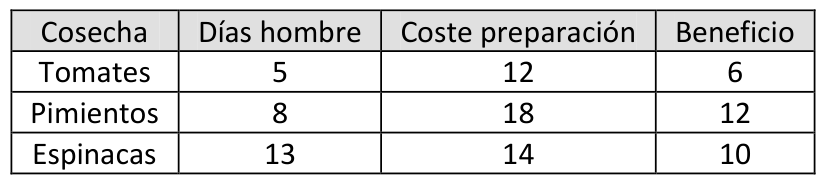

Suponga que el número de días hombre disponibles es de 4.000, y que el granjero tiene 6.000 euros para preparación.

#### Modelación del Problema
Definición de las variables de decisión:

- $ x_1 $: número de acres dedicados a tomates.
- $ x_2 $: número de acres dedicados a pimientos.
- $ x_3 $: número de acres dedicados a espinacas.

Función objetivo:

$\text{Maximizar } Z = 6x_1 + 12x_2 + 10x_3$

Sujeto a las restricciones:
1. El total de acres no puede exceder de 600, lo que se traduce en la restricción:\
$ x_1 + x_2 + x_3 \leq 600 $

2. El número total de días hombre disponibles es 4000, lo que implica la restricción:\
$ 5x_1 + 8x_2 + 13x_3 \leq 4000 $

3. El presupuesto para la preparación no puede superar los 6000 euros, que se traduce en:\
$ 12x_1 + 18x_2 + 14x_3 \leq 6000 $

4. Además, no se pueden asignar un número negativo de acres a cada cultivo, por lo que:\
$ x_1 \geq 0 $,
$ x_2 \geq 0 $,
$ x_3 \geq 0 $

#### Solución Computacional

In [4]:
# Creación del modelo y las variables
model = pyo.ConcreteModel()
model.x = pyo.Var([1,2,3], domain=pyo.NonNegativeReals)

# Función objetivo
model.OBJ = pyo.Objective(expr = 6*model.x[1] + 12*model.x[2] + 10*model.x[3], sense = pyo.maximize)

# Restricciones del modelo
model.Constraint1 = pyo.Constraint(expr = model.x[1] + model.x[2] + model.x[3] <= 600) # Los acres totales no pueden exceder de 600
model.Constraint2 = pyo.Constraint(expr = 5*model.x[1] + 8*model.x[2] + 13*model.x[3] <= 4000) # Restricción de días hombre
model.Constraint3 = pyo.Constraint(expr = 12*model.x[1] + 18*model.x[2] + 14*model.x[3] <= 6000) # Restricción de coste de preparación

# Configuración y solución del problema con el solver
solver = pyo.SolverFactory('glpk')  # o cualquier otro solver que tengas instalado
resultado = solver.solve(model)

In [5]:
# Mostrar los resultados
for i in model.x:
    print(f'Acres dedicados al cultivo {i}: {model.x[i].value}')

# También imprimimos el beneficio total
print(f'Beneficio total: {model.OBJ.expr()}')

Acres dedicados al cultivo 1: 0.0
Acres dedicados al cultivo 2: 180.327868852459
Acres dedicados al cultivo 3: 196.72131147541
Beneficio total: 4131.1475409836075


#### **Problema 14**
Una empresa ensambla un producto que consta de tres piezas denominadas AA, BB, y CC. Las piezas AA y BB las fabrica la propia empresa, mientras que las piezas CC las compra a otro fabricante. Los tiempos de proceso, en horas, requeridos por cada pieza en cada uno de los procesos vienen dados en la tabla siguiente:

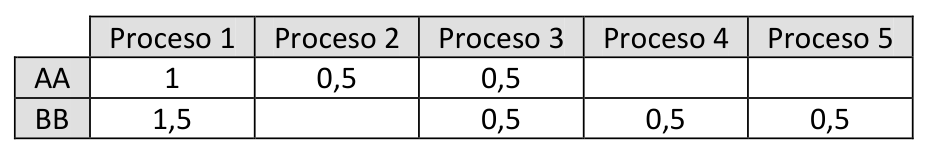

La empresa dispone de 20 máquinas que pueden realizar el proceso 1, 5 el proceso 2, 10 el proceso 3, 5 el proceso 4 y 5 el proceso 5. Cada máquina trabaja un máximo de cinco días cada semana a razón de cincuenta semanas al año, en jornadas laborables de 8 horas diarias. Determine el número máximo de conjuntos ensamblados que puede producir.

#### Modelación del Problema
Definición de las variables de decisión:

$x_i$: Número de unidades a fabricar de la pieza $i$ tal que $i \in \{AA, BB, CC\}$

Función objetivo:

$\text{Maximizar } Z = x_{AA}$

Sujeto a las restricciones:

$x_{AA} \leq 16,000 $ \
$x_{AA} \leq 20,000 $ \
$x_{AA} \leq 20,000 $ \
$x_{AA} \leq 12,000 $ \
$x_{AA} \leq 24,000 $ \
$x_{AA} \geq 0$

#### Solución Computacional

In [6]:
# Creación del modelo
model = pyo.ConcreteModel()

# Definición de las variables de decisión
model.x_AA = pyo.Var(domain=pyo.NonNegativeReals)  # Número de unidades a fabricar de la pieza AA

# Función objetivo
model.objetivo = pyo.Objective(expr=model.x_AA, sense=pyo.maximize)

# Restricciones
model.restriccion1 = pyo.Constraint(expr=model.x_AA <= 16000)
model.restriccion2 = pyo.Constraint(expr=model.x_AA <= 20000)
model.restriccion3 = pyo.Constraint(expr=model.x_AA <= 20000)
model.restriccion4 = pyo.Constraint(expr=model.x_AA <= 12000)
model.restriccion5 = pyo.Constraint(expr=model.x_AA <= 24000)

In [7]:
# Configuración del solver
solver = pyo.SolverFactory('glpk')  # Puedes cambiar 'glpk' por el solver que tengas instalado

# Solución del problema
solver.solve(model)

# Impresión de la solución
print(f'Número máximo de unidades de la pieza AA que se pueden fabricar: {model.x_AA.value}')

Número máximo de unidades de la pieza AA que se pueden fabricar: 12000.0


#### **Problema 15**
Se desea planificar la producción de dos productos XA y ZA. La demanda prevista para los próximos meses viene dada en la tabla siguiente:

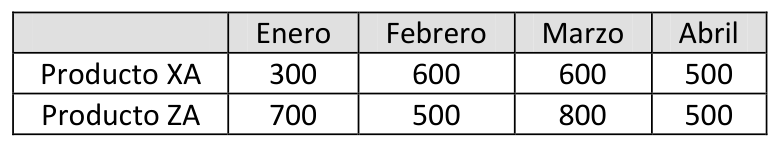

El inventario a principios de año de los productos XA y ZA es de 100 y 200 respectivamente. Al finalizar el horizonte de planificación se desea disponer al menos de 300 unidades del producto ZA. Los costes de almacenaje de los productos XA y ZA son respectivamente de 2 euros y 1 euro por unidad almacenada y mes. Debido a limitaciones de espacio, la cantidad de productos almacenados no puede exceder de 300 unidades mensuales. La cantidad máxima que puede fabricarse mensualmente es de 400 unidades de XA y 700 de ZA. Formule el problema de de planificación de la producción teniendo como objetivo minimizar el coste total de inventario.

#### Modelación del Problema

Sujeto a las restricciones:



#### Solución Computacional

#### **Problema de la Mochila**

#### Solución Computacional

In [33]:
from pyomo.environ import *

In [36]:
# Creacion del modelo
model = ConcreteModel()

# Parametros: material = [PINO,ABETO,ROBLE]
C = [[500, 550, 800],  # Mesas=
     [450, 0, 700],  # Sillas=
     [0, 0, 1200]  # BancaMesa=
     ]

# Variables de decision 
Producto = list(range(1, 4))
Material = list(range(1, 4))
model.x = Var(Producto, Material, within=Reals, bounds=(0, 1000), initialize=0)

# Funcion objetivo
model.OBJ = Objective(expr=sum(C[i-1][j-1]*model.x[i, j]
                      for i in Producto for j in Material)-(3750)-(6600), sense=maximize)

# Restricciones
model.Constraint1 = Constraint(expr=3*model.x[1, 3] + 4*model.x[2, 3] <= 30)
model.Constraint2 = Constraint(expr=5*model.x[2, 1] <= 40)
model.Constraint3 = Constraint(
    expr=2.5*model.x[1, 2] + 4*model.x[2, 2] + 12*model.x[3, 2] <= 15)
model.Constraint4 = Constraint(expr=2.5*model.x[1, 3] + 1.5*model.x[2, 3] + 4.5 *
                               model.x[2, 1] + 2.5*model.x[1, 2] + 4.5*model.x[2, 2] + 9*model.x[3, 1] <= 20)

In [37]:
# Configuracion del solver y resultados
solver = SolverFactory('glpk')
results = solver.solve(model)

In [38]:
productos = {1:"Sillas", 2:"Mesas", 3:"Mesabanca" }
materiales = {1:"Pino", 2:"Abeto", 3:"Roble" }

for i in Producto:
    for j in Material:
        print(productos[i], materiales[j],int(ceil(value(model.x[i,j]))))

Sillas Pino 1000
Sillas Abeto 4
Sillas Roble 0
Mesas Pino 0
Mesas Abeto 0
Mesas Roble 8
Mesabanca Pino 0
Mesabanca Abeto 0
Mesabanca Roble 1000
